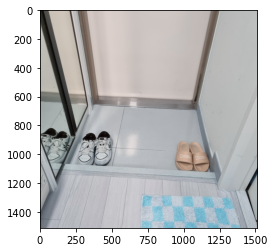

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

im1 = cv2.imread("./data/h3.jpg")
plt.imshow(im1)

## 바닥 추출 

## floor detection 

1. First, the image is blurred and Canny edge detection is used to detect the edges in the image.
2. Second, Connected component analysis is done to filter out irrelevant edges.
3. Then, Hough line transform is applied to detect both the corner edge-lines of the floor (lines of intersection of the floor and the walls of the hallway).
4. The area between these two edge lines is marked as the floor of the hallway.

In [7]:
import cv2
import numpy as np
from skimage import measure
import sys
import math

print("EXECUTION STARTED")
lowThreshold = 50
highThreshold = 100

maxThreshold = 200

apertureSizes = [3, 5, 7]
maxapertureIndex = 2
apertureIndex = 0

blurAmount = 0
maxBlurAmount = 20

# Function for all trackbar calls
def applyCanny():
	#########################gamma correction to obtain better contrast#########################
	# low_threshold = 50
	# high_threshold = 200
	# gamma1 = 0.4
	# gamma2 = 1.5
	# for i in range(src.shape[0]):
		# for j in range(src.shape[1]):
			# if(src.item(i,j) < low_threshold):
				# temp = 255*((src.item(i,j)/255)**gamma1)
				# src.itemset((i,j), temp)
			# if(src.item(i,j) > high_threshold):
				# temp = 255*((src.item(i,j)/255)**gamma2)
				# src.itemset((i,j), temp)
	#############################################################################################
	blurAmount = 3
	apertureSize=3
	lowThreshold=50
	highThreshold=100
	if(blurAmount > 0):
		blurredSrc = cv2.GaussianBlur(src, (3, 3), 0);
	else:
		blurredSrc = src.copy()
	#apertureSize = apertureSizes[apertureIndex];
	global edges
	edges = cv2.Canny( blurredSrc, lowThreshold, highThreshold, apertureSize)
	cv2.namedWindow("without ero_dil",cv2.WINDOW_NORMAL)
	cv2.imshow("without ero_dil",edges)
	kernel = np.ones((5,5),np.uint8)
	edges = cv2.dilate(edges,kernel,iterations =5)
	edges = cv2.erode(edges,kernel,iterations =3)
	labels, no_of_blobs = measure.label(edges, connectivity=2, background=0, return_num=True)
	print("number of blobs =", no_of_blobs)
	pix_limit_low = 500
	pix_limit_high = 2000
	global final_img
	final_img = np.zeros(edges.shape, dtype="uint8")
	for label in np.unique(labels):
		if(label==0):
			continue
		label_mask = np.zeros(edges.shape, dtype="uint8")
		label_mask[labels == label] = 255
		num_pix = cv2.countNonZero(label_mask)
		if(num_pix > pix_limit_high & num_pix < pix_limit_low):
			continue
		else:
			final_img = final_img + label_mask
	cv2.imshow("Edges",final_img)

# Function to update low threshold value
def updateLowThreshold( *args ):
	global lowThreshold
	lowThreshold = args[0]
	applyCanny()
	pass

# Function to update high threshold value
def updateHighThreshold( *args ):
	global highThreshold
	highThreshold = args[0]
	applyCanny()
	pass

# Function to update blur amount
def updateBlurAmount( *args ):
	global blurAmount
	blurAmount = args[0]
	applyCanny()
	pass

# Function to update aperture index
def updateApertureIndex( *args ):
	global apertureIndex
	apertureIndex = args[0]
	applyCanny()
	pass
	
src = cv2.imread("./data/h3.jpg", 0)
src_c = cv2.imread("./data/h3.jpg", 1)


edges = src.copy()
# Display images
cv2.namedWindow("Edges", cv2.WINDOW_NORMAL)
cv2.imshow("Edges", src)

applyCanny()
# cv2.createTrackbar( "Low Threshold", "Edges", lowThreshold, maxThreshold, updateLowThreshold)
# cv2.createTrackbar( "High Threshold", "Edges", highThreshold, maxThreshold, updateHighThreshold)
# cv2.createTrackbar( "aperture Size", "Edges", apertureIndex, maxapertureIndex, updateApertureIndex)
# cv2.createTrackbar( "Blur", "Edges", blurAmount, maxBlurAmount, updateBlurAmount)

cv2.waitKey(0)
minLineLength = 100
maxLineGap = 50
lines=cv2.HoughLinesP(final_img,0.02,np.pi/500,50,minLineLength,maxLineGap)

if lines is None:
	print("No lines detected. Exiting from program")
	sys.exit()

print("HoughLines :",lines)

cv2.destroyAllWindows()

EXECUTION STARTED
number of blobs = 7
HoughLines : [[[ 694 1474 1469 1474]]

 [[ 921 1440 1498 1440]]

 [[ 340 1153 1069 1153]]

 ...

 [[1030 1064 1124 1064]]

 [[1173 1176 1236 1176]]

 [[1042  634 1106  634]]]


In [ ]:
#lines = cv2.HoughLines(edges,1,np.pi/180,20)


a,b,c = lines.shape
(rows, cols)=edges.shape #edges and final_img are of same size.
print("edges.shape =",edges.shape)
print("len(lines) =",len(lines))
print("lines.shape =", lines.shape)
### lines.shape format (1L, 1L, 4L)
for line in lines:
	# for r,theta in line:
		# a = np.cos(theta)
		# b = np.sin(theta)
		# x0 = a*r
		# y0 = b*r
		# x1 = int(x0 + 1000*(-b))
		# y1 = int(y0 + 1000*(a))
		# x2 = int(x0 - 1000*(-b))
		# y2 = int(y0 - 1000*(a))
		# cv2.line(src_c,(x1,y1),(x2,y2),(0,255,0),1)
	for x1,y1,x2,y2 in line:
		cv2.line(src_c,(x1,y1),(x2,y2),(0,255,0),10)
for i in range(0, len(lines)):
	l = lines[i][0]
	########################################## May need a change src_c ############################################
	cv2.line(src_c,(l[0],l[1]),(l[2],l[3]),(0,255,0),10)
    
    
x_deviation = 20#specefies how many pixels apart x1 & x2 of a line can be spread for that line to be considered as vertical & hence recognize it as non-floor edge
y_deviation = 20
count = 0
frame_center = cols/2
cv2.namedWindow("LINES", cv2.WINDOW_NORMAL)
#cv2.circle(src_c,(1000,2000),100,(255,0,0),3) ---> AXES ARE x = X, y = -Y.


x_top_left=None
y_top_left=None
x_bottom_left=None
y_bottom_left=None
x_top_right=None
y_top_right=None
x_bottom_right=None
y_bottom_right=None
for i in range(b):
	x1 = lines[0][i][0]
	y1 = lines[0][i][1]
	x2 = lines[0][i][2]
	y2 = lines[0][i][3]
	x_min = min(x1, x2)
	y_min = min(y1, y2)
	x_max = max(x1, x2)
	y_max = max(y1, y2)
	x_length = x_max - x_min
	y_length = y_max - y_min
	if ((x_length <= x_deviation) | (y_length <= y_deviation)):
		continue #If the line is nearly horizontal / vertical, it doesn't belong to floor edge hence ignore.
	slope = round (((y1-y2) / (float)(x2-x1)), 2)
	if ((x_bottom_left == None) & (slope>0)):
		x_bottom_left = x_min #left refers left edge of floor
		y_bottom_left = y_max
		x_top_left = x_max
		y_top_left = y_min
	if ((x_bottom_right == None)& (slope<0)):
		x_bottom_right = x_max #right refers right edge of floor
		y_bottom_right = y_max
		x_top_right = x_min
		y_top_right = y_min
	if (slope > 0):#slope > 0 means line belongs to left edge of floor
		if (x_min < x_bottom_left):#if current line is more to left than current bottom point(of final left floor edge),use bottom point of current line as bottom point(of final left floor edge)
			x_bottom_left = x_min
			y_bottom_left = y_max
		if (x_max > x_top_left):#if current line is more to right than current top point(of final left floor edge), use top point of current line as top point(of final left floor edge)
			x_top_left = x_max
			y_top_left = y_min
	else:#slope < 0 means line belongs to right edge of floor
		if (x_max > x_bottom_right):#if current line is more to right than current bottom point(of final right floor edge),use bottom point of current line as bottom point(of final right floor edge)
			x_bottom_right = x_max
			y_bottom_right = y_max
		if (x_min < x_top_right):#if current line is more to left than current top point(of final right floor edge), use top point of current line as top point(of final right floor edge)
			x_top_right = x_min
			y_top_right = y_min
	cv2.line(src_c, (x1, y1), (x2, y2), (0, 255, 0), 1)
	line_length = (x_length**2+y_length**2)**(1/2.0)
	print("x1 y1 x2 y2",x1, y1, x2, y2,"slope =",slope,"x_top_left =",x_top_left,"y_top_left =",
          y_top_left,"x_bottom_left =",x_bottom_left,"y_bottom_left =",y_bottom_left,"x_top_right =",
          x_top_right,"y_top_right =",y_top_right,"x_bottom_right =",x_bottom_right,"y_bottom_right =",
          y_bottom_right)
	cv2.rectangle(src_c, (x1, y1), (x2, y2), (0, 0, 255), 3)
	count+=1
print("Drew",count,"lines")
print("left line x1 y1 x2 y2 =",x_bottom_left,y_bottom_left, x_top_left,y_top_left)
print("right line x1 y1 x2 y2 =",x_bottom_right,y_bottom_right, x_top_right,y_top_right)
cv2.line(src_c, (x_bottom_right,y_bottom_right), (x_top_right,y_top_right), (255,0,0), 3)
cv2.line(src_c, (x_bottom_left,y_bottom_left), (x_top_left,y_top_left), (255,0,0), 3)
cv2.imshow("LINES",src_c)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
########### Forming floor central line from edges of the floor #######################################
slope_left = round (((y_bottom_left-y_top_left) - (float)(x_top_left-x_bottom_left)), 2)
slope_right = round (((y_bottom_right-y_top_right) - (float)(x_top_right-x_bottom_right)), 2)
if (y_bottom_left > y_bottom_right): #If left floor edge is lower than than right floor edge, extend right floor edge
	y_bottom_right_new = y_bottom_left
	x_bottom_right_new = (int)(((1/slope_right)*(y_bottom_right - y_bottom_right_new)) + x_bottom_right) #using y-y1 = m*(x-x1) eq to extend right floor edge
	#(int) is used becz x_bottom_right_new corresponds to a pixel number, which should be integer.
	#Now find coordinate of floor center line
	y_bottom_center = y_bottom_right_new
	x_bottom_center = (x_bottom_right_new + x_bottom_left)/2
else: #else extend left floor edge
	y_bottom_left_new = y_bottom_right
	x_bottom_left_new = (int)(((1/slope_left)*(y_bottom_left - y_bottom_left_new)) + x_bottom_left) #using y-y1 = m*(x-x1) eq to extend left floor edge
	y_bottom_center = y_bottom_left_new
	x_bottom_center = (x_bottom_right + x_bottom_left_new)/2
if (y_top_left > y_top_right): #If left floor edge is higher than than right floor edge, extend right floor edge
	y_top_right_new = y_top_left
	x_top_right_new = (int)(((1/slope_right)*(y_top_right - y_top_right_new)) + x_top_right) #using y-y1 = m*(x-x1) eq to extend right floor edge
	y_top_center = y_top_right_new
	x_top_center = (x_top_right_new + x_top_left)/2
else: #else extend left floor edge
	y_top_left_new = y_top_right
	x_top_left_new = (int)(((1/slope_left)*(y_top_left - y_top_left_new)) + x_top_left) #using y-y1 = m*(x-x1) eq to extend left floor edge	
	y_top_center = y_top_left_new
	x_top_center = (x_top_left_new + x_top_right)/2

###########################extending length of floor centerline so that it covers decent part of floor###########################
slope_floor_center = (y_top_center-y_bottom_center)/((float)(x_bottom_center-x_top_center))#assigns float value
x_top_center_new = (int)(x_top_center+(1/slope_floor_center)*(y_top_center-(rows/3)))
x_bottom_center_new = (int)(x_top_center+(1/slope_floor_center)*(y_top_center-(rows-1)))
floor_center_line = [x_top_center_new, (rows/3), x_bottom_center_new, (rows-1)]#in the order x1 y1 x2 y2 & assuming floor occupies 1/3rd of the frame height
frame_center_line = [frame_center, (rows/3), frame_center, (rows-1)]#in the order x1 y1 x2 y2
cv2.line(src_c, (floor_center_line[0], floor_center_line[1]), (floor_center_line[2],floor_center_line[3]), (255, 0, 0), 3)
cv2.line(src_c, (frame_center_line[0],frame_center_line[1]), (frame_center_line[2],frame_center_line[3]),(0, 0, 255), 3)#center line of frame
y_coor_POI = (int)(floor_center_line[1]+slope_floor_center*(floor_center_line[0]-frame_center))#y - coordinate of point of intersection of lines
if(y_coor_POI >= (rows/3)):#If the lines intersect within the floor region, find the angle b/w them
	y_distance = y_coor_POI-(rows/3)
	x_coordinate = (int)(floor_center_line[0]+(1/slope_floor_center)*(floor_center_line[1]-(rows/3))) #finding x coordinate of the point on floor center line wheye y_coordinate is rows/3
	x_distance = (x_coordinate-frame_center)
	angle = math.atan(y_distance/x_distance)#-ve for bot lying on right half of floor & +ve for bot lying on left half of floor
cv2.imshow("LINES",src_c)
######################################################################################################

#cv2.namedWindow("LINES", cv2.WINDOW_NORMAL)
#cv2.imshow("LINES",src_c)
cv2.waitKey(0)
cv2.destroyAllWindows()


# enhc = np.zeros(edges.shape, dtype=int)

# cv2.waitKey(0)
# # cv2.imwrite("edges.jpg", edges)

# labels, ret = measure.label(edges, neighbors=8, background=0, return_num=True)
# print(ret
# for label in np.unique(labels):
	# if(label==0):
		# continue
	# label_mask = np.zeros(edges.shape, dtype="uint8")
	# label_mask[labels == label] = 255
	# num_pix = cv2.countNonZero(label_mask)
	# if(num_pix < 300):
		# continue
	# cv2.imshow("Edges", label_mask)
	# print("showing blob =",label
	# for i in range(label_mask):
		# count = 0
		# print("Hello",i
		
	# cv2.waitKey(0)

edges.shape = (1512, 1512)
len(lines) = 1539
lines.shape = (1539, 1, 4)
Drew 0 lines
left line x1 y1 x2 y2 = None None None None
right line x1 y1 x2 y2 = None None None None


TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

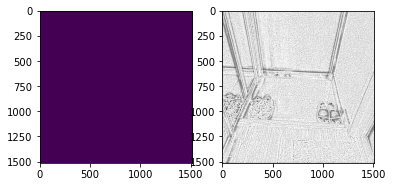

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

def analyze_color(image):
    """
    HSV 색공간을 사용하여 이미지의 특정 색상을 분석합니다.
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # 바닥 색상 범위 정의 (이 부분은 조정이 필요할 수 있습니다)
    lower_color = np.array([0, 50, 50])
    upper_color = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_color, upper_color)
    return mask

def analyze_texture(image):
    """
    Local Binary Pattern(LBP)을 사용하여 이미지의 텍스처를 분석합니다.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, 24, 8, method='uniform')
    return lbp

# 이미지 불러오기
image = cv2.imread("./data/h3.jpg")

# 색상 및 텍스처 분석
color_mask = analyze_color(image)
texture = analyze_texture(image)


plt.subplot(121)
plt.imshow(color_mask)

plt.subplot(122)
plt.imshow(texture, cmap='gray')


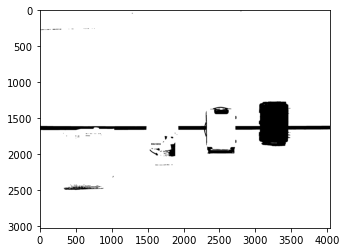

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def extract_floor_layout(image_path):
    # 이미지를 읽어옴
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 바닥의 색상 범위 정의 (이 부분은 실험을 통해 조정해야 할 수 있음)
    # 예를 들어, 회색 바닥의 경우 아래와 같은 HSV 범위를 설정할 수 있음
    lower_hsv = np.array([0, 0, 100])
    upper_hsv = np.array([180, 255, 255])

    # 색상 범위에 따라 마스크 생성
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

    # 이진화 및 노이즈 제거
    _, binary = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    return binary

# 이미지 파일 경로
image_path = "./data/IMG_9586.jpg"

# 바닥 레이아웃 추출
floor_layout = extract_floor_layout(image_path)

# 결과 이미지 표시
plt.imshow(floor_layout,cmap='gray')

In [20]:
import cv2

# 비디오 캡처 객체 생성
cap = cv2.VideoCapture('./data/walking.avi')

# 배경 차감 객체 생성 (MOG2 알고리즘 사용)
backSub = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 배경 차감 적용
    fgMask = backSub.apply(frame)

    # 결과 표시
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)

    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

# 자원 해제
cap.release()
cv2.destroyAllWindows()

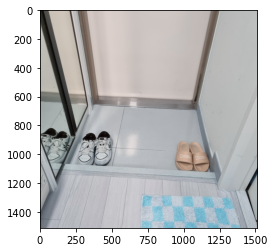

In [22]:
image = cv2.imread("./data/h3.jpg")
plt.imshow(image)

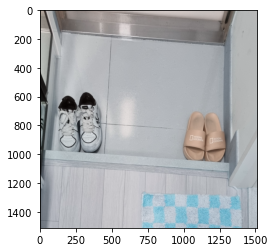

In [31]:
import cv2
import numpy as np

def find_homography_and_transform(image, src_points, dst_points):
    # 호모그래피 변환 행렬 계산
    H, _ = cv2.findHomography(src_points, dst_points)

    # 호모그래피 변환 적용
    transformed_image = cv2.warpPerspective(image, H, (image.shape[1], image.shape[0]))

    return transformed_image

# 이미지 로드
image = cv2.imread("./data/h3.jpg")

height, width = image.shape[:2]

# 바닥과 벽의 경계를 형성하는 점들 (수동으로 지정)
# 예: 바닥의 4개 모서리
src_points = np.array([[300, 600],  # 좌상단 모서리
                       [1200, 600],  # 우상단 모서리
                       [1500, 1500],  # 우하단 모서리
                       [0, 1500]], # 좌하단 모서리
                       dtype=np.float32)


# 변환될 새로운 위치의 점들
dst_points = np.array([[0, 0],               # 새로운 좌상단 모서리
                       [width, 0],      # 새로운 우상단 모서리
                       [width, height],  # 새로운 우하단 모서리
                       [0, height]],    # 새로운 좌하단 모서리
                       dtype=np.float32)
# 호모그래피 변환 적용
transformed_image = find_homography_and_transform(image, src_points, dst_points)

# 결과 표시
# cv2.imshow('Original Image', image)
# cv2.imshow('Transformed Image', transformed_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(transformed_image)

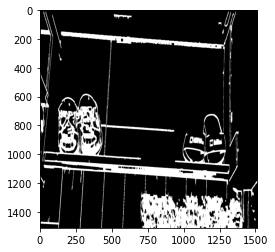

In [54]:
transformed_edge = cv2.Canny(transformed_image, 30, 200)
transformed_edge = cv2.dilate(transformed_edge, (5,5),iterations=20)

transformed_edge = cv2.erode(transformed_edge, (5,5),iterations=10)

plt.imshow(transformed_edge, cmap='gray')

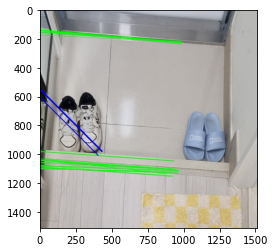

In [55]:
edge = transformed_edge.copy()

im = transformed_image.copy()

lines = cv2.HoughLines(edge, 1, np.pi / 180, threshold=950)

horizontal_lines = []
vertical_lines = []
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # 각도를 기준으로 수평선과 수직선을 분류
        if theta < np.pi / 4 or theta > 3 * np.pi / 4:  # 수직선
            vertical_lines.append((x1, y1, x2, y2))
            cv2.line(im, (x1, y1), (x2, y2), (255, 0, 0), 2)
        elif np.pi / 4 <= theta <= 3 * np.pi / 4:  # 수평선
            horizontal_lines.append((x1, y1, x2, y2))
            cv2.line(im, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

plt.show()

---

In [ ]:
def get_mask(img1, img2, thresh):
    if img1.shape != img2.shape:
        return
    diff = cv2.absdiff(img1, img2)
    diff = np.mean(diff, axis=2)
    diff[diff <= thresh] = 0
    diff[diff > thresh] = 255
    mask = np.dstack([diff] * 3)
    return mask

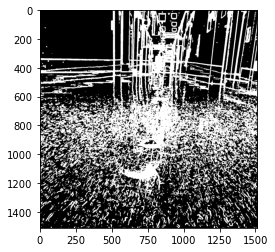

In [65]:
import cv2
from skimage.metrics import structural_similarity as ssim
import numpy as np

def compute_ssim(imageA, imageB):
    # 이미지를 그레이스케일로 변환
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # SSIM 계산
    score, diff = ssim(grayA, grayB, full=True)
    return score, diff

# 참조 이미지(바닥)와 비교할 새 이미지 로드
floor_reference = cv2.imread("./data/ggul_front.jpg")
new_image = cv2.imread("./data/ggul_mid.jpg")

# SSIM 계산
score, diff = compute_ssim(floor_reference, new_image)

# diff를 0에서 255 사이로 스케일링하고 uint8 타입으로 변환
diff = (diff * 127.5 + 127.5).astype("uint8")

# 차이 이미지를 이진화하여 유사한 영역 강조
_, thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')

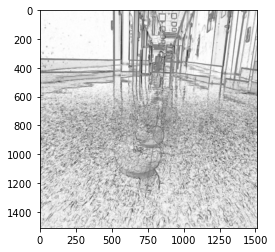

In [66]:
plt.imshow(diff, cmap='gray')